In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./number-of-estimated-paralytic-polio-cases-by-world-region.csv")
data.head()

,Entity,Code,Year,Total (estimated) polio cases
0,Afghanistan,AFG,1980,6160
1,Afghanistan,AFG,1981,5859
2,Afghanistan,AFG,1982,9730
3,Afghanistan,AFG,1983,13937
4,Afghanistan,AFG,1984,3864


In [3]:
polio_cases_by_country_year = data.pivot_table(index='Year', columns='Entity', values='Total (estimated) polio cases', fill_value=0)
polio_cases_by_country_year.head()

Entity,Afghanistan,Africa,Albania,Algeria,Americas,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Western Pacific,World,Yemen,Yugoslavia,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1980,6160.0,35882.0,7.0,812.0,20923.0,0.0,224.0,0.0,224.0,0.0,...,0.0,14.0,77.0,12187.0,79940.0,368410.0,5054.0,0.0,1932.0,224.0
1981,5859.0,29337.0,7.0,798.0,10094.0,0.0,84.0,0.0,14.0,0.0,...,0.0,7.0,476.0,4508.0,78008.0,460159.0,3787.0,0.0,3003.0,196.0
1982,9730.0,27279.0,0.0,497.0,6972.0,0.0,42.0,0.0,84.0,0.0,...,0.0,14.0,210.0,6279.0,70294.0,361396.0,1645.0,0.0,1701.0,63.0
1983,13937.0,21462.0,0.0,924.0,7511.0,0.0,0.0,0.0,182.0,0.0,...,0.0,0.0,63.0,7763.0,34622.0,279811.0,4431.0,0.0,1274.0,21.0
1984,3864.0,20776.0,0.0,756.0,4053.0,0.0,21.0,0.0,7.0,0.0,...,0.0,0.0,63.0,8106.0,29610.0,245588.0,5369.0,0.0,1239.0,28.0


In [4]:
average_cases_per_year = polio_cases_by_country_year.mean(axis=1)
average_cases_per_year.head()

Year
1980    5313.605769
1981    6636.908654
1982    5212.442308
1983    4035.735577
1984    3542.134615
dtype: float64

In [5]:
regions = ['Europe', 'Americas', 'Africa', 'Eastern Mediterranean', 'Western Pacific', 'South-East Asia']
polio_cases_by_region = data[data['Entity'].isin(regions)]

polio_cases_by_region_year = polio_cases_by_region.pivot_table(index='Year', columns='Entity', values='Total (estimated) polio cases', fill_value=0)

polio_cases_by_region_year.head(6)

Entity,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
Year,,,,,,
1980,35882.0,20923.0,88354.0,2688.0,140623.0,79940.0
1981,29337.0,10094.0,60816.0,2352.0,279552.0,78008.0
1982,27279.0,6972.0,61579.0,2324.0,192948.0,70294.0
1983,21462.0,7511.0,37149.0,1757.0,177310.0,34622.0
1984,20776.0,4053.0,24269.0,924.0,165956.0,29610.0
1985,27545.0,5005.0,39228.0,714.0,160748.0,36141.0


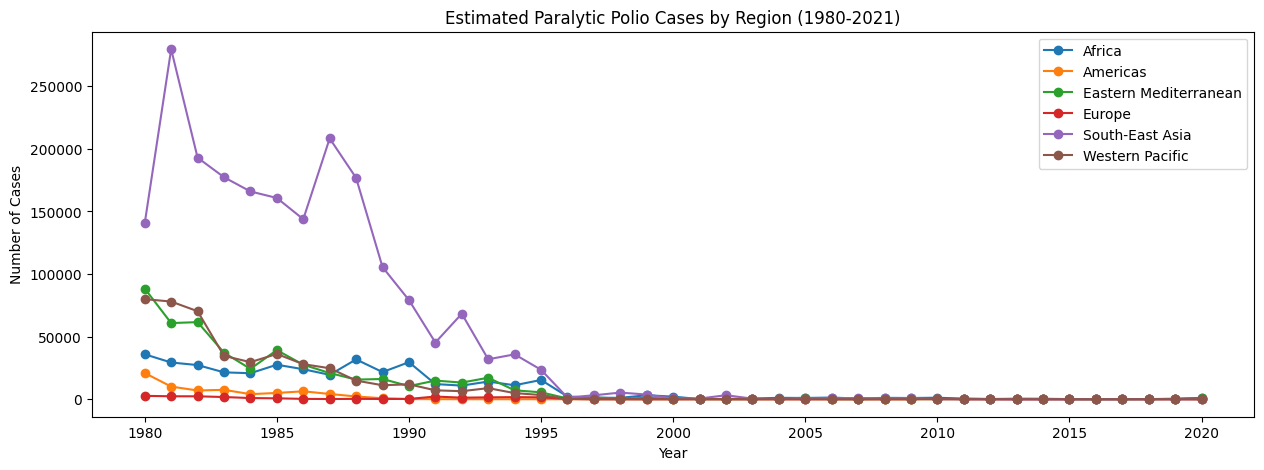

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))

for region in polio_cases_by_region_year.columns:
    ax.plot(polio_cases_by_region_year.index, polio_cases_by_region_year[region], label=region, marker='o')

ax.set_title('Estimated Paralytic Polio Cases by Region (1980-2021)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Cases')
ax.legend()

In [7]:
relative_change = ((polio_cases_by_region_year.iloc[-1] - polio_cases_by_region_year.iloc[0]) / polio_cases_by_region_year.iloc[0]) * 100
relative_change = relative_change.replace([float('inf'), -float('inf')], 0)

relative_change.head(6)
relative_change.index

Index(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific'],
      dtype='object', name='Entity')

Text(0, 0.5, 'Percentage Change')

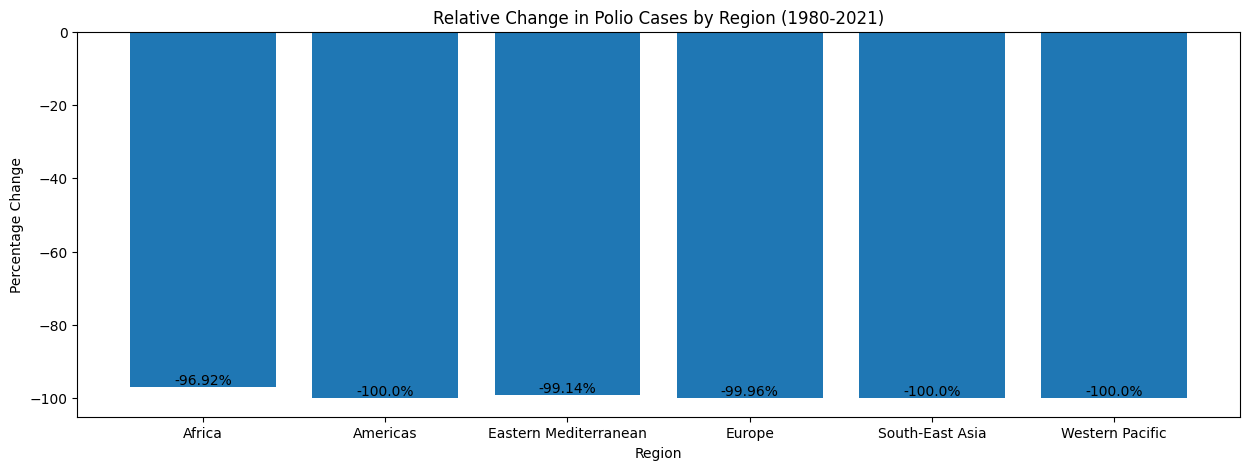

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))

bars = ax.bar(relative_change.index, relative_change)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', va='bottom', ha='center')

ax.set_title('Relative Change in Polio Cases by Region (1980-2021)')
ax.set_xlabel('Region')
ax.set_ylabel('Percentage Change')